# Answer template

Please use this notebook for your coursework. Feel free to add more cells for your code and answers, but try to stick to this format. This will make it easier to mark everyone's work fairly.

___________________

In [1]:
# run this
!pip list

Package                       Version
----------------------------- ------------
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites 

Twisted                       22.10.0
typing_extensions             4.7.1
tzdata                        2023.3
uc-micro-py                   1.0.1
ujson                         5.4.0
Unidecode                     1.2.0
urllib3                       1.26.16
w3lib                         1.21.0
watchdog                      2.1.6
wcwidth                       0.2.5
webencodings                  0.5.1
websocket-client              0.58.0
Werkzeug                      2.2.3
whatthepatch                  1.0.2
wheel                         0.38.4
widgetsnbextension            4.0.5
wrapt                         1.14.1
wurlitzer                     3.0.2
xarray                        2023.6.0
xlwings                       0.29.1
xxhash                        2.0.2
xyzservices                   2022.9.0
y-py                          0.5.9
yapf                          0.31.0
yarl                          1.8.1
ypy-websocket                 0.8.2
zict                          2.2.0
zipp       

# Part A – Exploratory data analysis and data visualisation 

1. Using the pandas library, read the file dataset1.csv into a dataframe. Print or display the first five rows of the dataset. [1 mark]

In [2]:
# code here
import pandas as pd
monastery = pd.read_csv('dataset1.csv')
display(monastery.head())

,Monastery,Latitude,Longitude,City,Country,Administrative Region,Historical Region,Starting,Ending,Monastery_index
0,Cistercians,47.13,15.28,Seckau,Austria,Steiermark,STYRIA (AUSTRIA),1130,1958,0
1,Cistercians,48.05,16.13,Vienne,Austria,Niederoesterreich,STYRIA (AUSTRIA),1135,2011,0
2,Cistercians,48.61,15.20,Sanct Pölten,Austria,Niederoesterreich,STYRIA (AUSTRIA),1138,2011,0
3,Cistercians,48.20,14.74,Linz,Austria,Oberoesterreich,STYRIA (AUSTRIA),1142,1784,0
4,Cistercians,48.32,14.17,Linz,Austria,Oberoesterreich,STYRIA (AUSTRIA),1146,1945,0


2. Make a scatterplot from the dataset, with the Longitude column on the x axis, the Latitude column on the y axis, and the colour corresponding to the Monastery_index column. Within the scatterplot function, set the colour map to ’rainbow’. The result should be a scatterplot showing the position of every monastery, with different colours for monasteries with different values in Monastery_index.  [1 mark]

<Axes: xlabel='Longitude', ylabel='Latitude'>

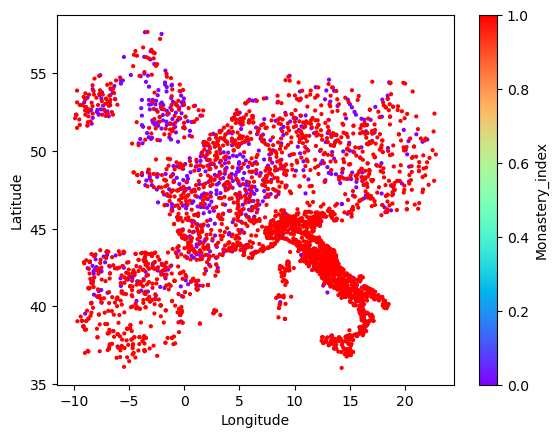

In [3]:
# code here
import numpy as np
import matplotlib.pyplot as plt

monastery.plot.scatter('Longitude','Latitude',c = 'Monastery_index', cmap ='rainbow',s = 4)

3. Plot a histogram for the monastery starting year of activity, represented in the Starting column.
Add the title “Starting year” to the plot. [1 mark]

Text(0.5, 1.0, 'Starting year')

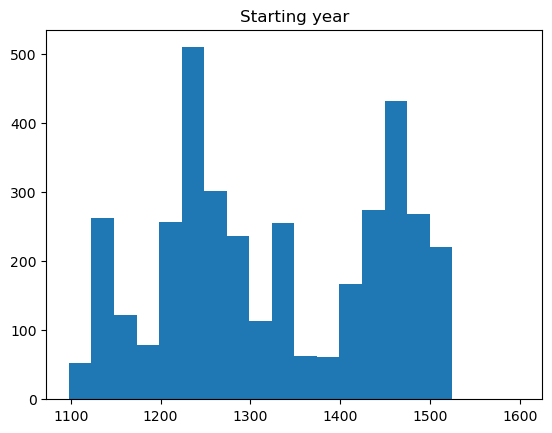

In [4]:
# code here
plt.hist(monastery['Starting'],bins=20)
plt.title("Starting year")

4. Make a figure with two histograms, still using the Starting column:

a) One histogram representing the Cistercian monasteries, corresponding to rows in the dataframe where the Monastery column is equal to 'Cistercians'.

b) And one histogram representing the Franciscan monasteries, corresponding to rows in the dataframe where the Monastery column is equal to 'Franciscans'.

c) Add a legend indicating which histogram corresponds to which type of monastery.

d) Add the title “Starting year” to the figure. 

[2 marks]

Text(0.5, 1.0, 'Starting year')

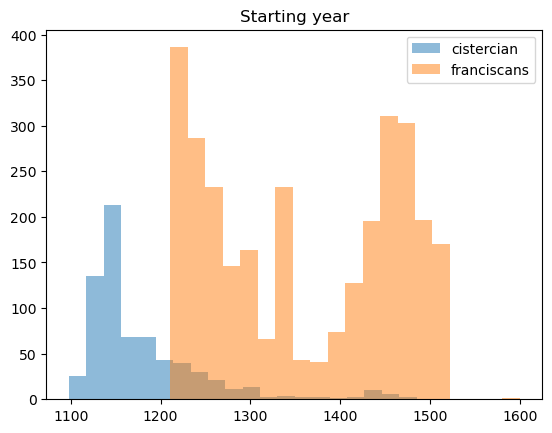

In [5]:
# code here
df_cistercian = monastery[monastery['Monastery'] == 'Cistercians']
df_franciscans = monastery[monastery['Monastery'] == 'Franciscans']

plt.hist(df_cistercian['Starting'], bins = 20, alpha=0.5, label='cistercian')
plt.hist(df_franciscans['Starting'], bins = 20, alpha=0.5, label='franciscans')
plt.legend(loc='upper right')
plt.title("Starting year")

5. Repeat numbers 3 and 4, but for the Ending column. Add the title “Ending year” to the plot.
[2 marks]

Text(0.5, 1.0, 'Ending year')

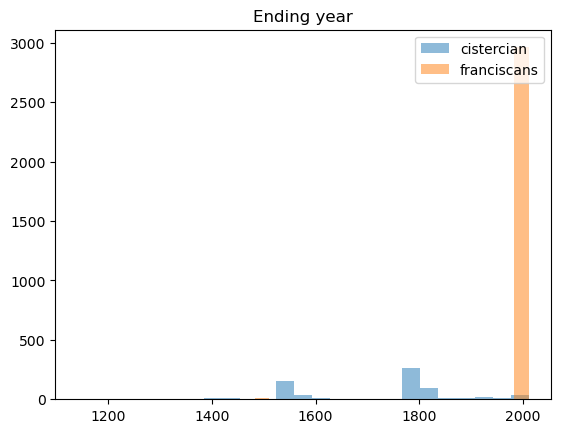

In [6]:
# code here

plt.hist(df_cistercian['Ending'], bins = 25, alpha=0.5, label='cistercian')
plt.hist(df_franciscans['Ending'], bins = 25, alpha=0.5, label='franciscans')
plt.legend(loc='upper right')
plt.title("Ending year")

6. Count the number of times each country appears in the Country column. Use that to make a bar plot, showing one bar for each country, with the bar height representing how many times each country appears in the Country column. This corresponds to the number of monasteries found in each country.
[2 marks]

{'Austria': 48, 'Belgium': 55, 'Czech Republic': 63, 'France': 724, 'Germany': 276, 'Hungary': 69, 'Ireland': 90, 'Italy': 1453, 'Netherlands': 49, 'Poland': 129, 'Portugal': 59, 'Slovakia': 21, 'Slovenia': 16, 'Spain': 418, 'Switzerland': 28, 'UK': 180}


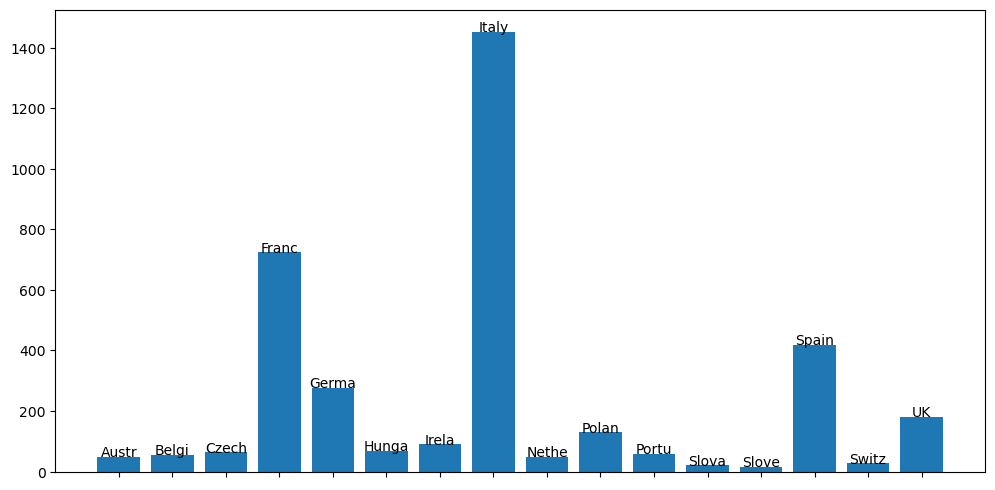

In [7]:
# Code here
all_countries = monastery.Country.unique()
dict_country = {}
for country in all_countries:
    dict_country[country] = 0
    
for country in all_countries:
    country_subset = len(monastery[monastery['Country']== country])
    dict_country[country] = country_subset
    
plt.figure(figsize=(12,6))

def addlabels(x,y):
    for item in range(len(x)):
        plt.text(item,y[item],y[item]) 

    
print(dict_country)
appearances = list(dict_country.values())
countries = list(dict_country.keys())
plt.bar(range(len(dict_country)), appearances, tick_label = "")
x_val = 0
for appearance,country in zip(appearances,countries):
    fullname = str(country)
    name = fullname[0]
    name = name+fullname[1]
    try:
        name = name+fullname[2]+fullname[3] +fullname[4]
    except:
        IndexError
        
    plt.text(x= x_val,y = appearance, s = name , ha="center")
    x_val = x_val + 1
    

plt.show()

#I decided not to try to show the exact differences between the "slo" countries, solvakia and solvenia
# This is because the main data points that are important are not those countries and the differences seem quite negligable

_____________________

# Part B – Training classifiers

7.	Define a variable X corresponding to the Starting and Ending columns of the dataset, and a variable y corresponding to the Monastery_index column. [1 mark]

In [8]:
# Code here
var_x = monastery[['Starting','Ending']]
var_y = monastery['Monastery_index']

8.	Perform a train-test split, separating X and y into a training test and a test set, leaving 33% of the data in the test set. [1 mark]

In [9]:
# Code here

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(var_x,var_y, test_size = 0.33)

9.	Classification using a Perceptron:

a)	Fit a perceptron to the training data, and use it to predict y values for the test set.
[1 mark]

b)	Calculate the fraction of data points in the test set where the predicted y values and the actual y values differ. This fraction should be equal to zero if the prediction is perfect, and equal to 1 if the prediction is wrong for 100% of the test set. Print the value of that fraction in decimals (like 0.01, 0.2394, or 0.9999923).  [2 marks]

c)	Plot a confusion matrix showing how well the classifier performs on the test set. [1 mark]

d)	Treating “Franciscan” as “Positive” and “Cistercian” as “Negative”, Print out the precision, recall, accuracy and F1 score of the perceptron. [2 marks]

0.18533772652388802
percision =  0.814662273476112 recall = 1.0 f1 =  0.8978665456196095


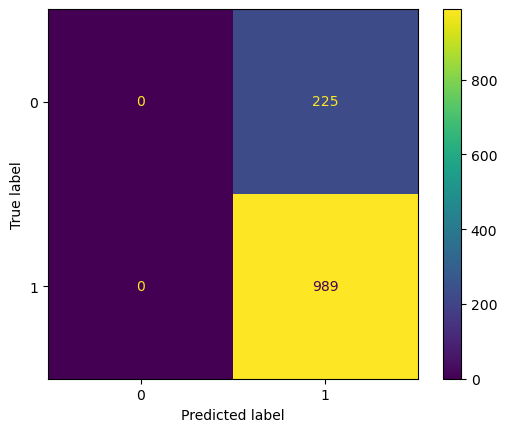

In [10]:
# Code here

from sklearn.linear_model import Perceptron
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
perc = Perceptron()
perc.fit(X_train, y_train)

predicted = perc.predict(X_test)

# score returns (correct guesses) / total guesses, the description of the fraction suggests that it is equal to 1 - score, since accurate models a score of one means perfect, for the sanme to be true for the described fraction it would have to be 0 which is 1-1.
fraction = 1 - perc.score(X_test,y_test)
print(fraction)

y_pred = perc.predict(X_test)
cmatrix = metrics.confusion_matrix(y_test, predicted)

matrix = ConfusionMatrixDisplay(confusion_matrix=cmatrix)
matrix.plot()

# Franciscan = 1, Cistercian = 0

tp = cmatrix[1][1]
fp = cmatrix[0][1]
tn = cmatrix[0][0]
fn = cmatrix [1][0]

percision = tp/(tp+fp)
recall = tp/ (tp + fn)
f1 = 2*((percision*recall)/(percision + recall))

print("percision = ", percision, "recall =", recall, "f1 = ", f1)

10.	Classification using Logistic Regression: do the same as the question above, but using the logistic regression classifier. [4 marks]

0.02635914332784184
percision =  0.9751737835153923 recall = 0.9929221435793731 f1 =  0.9839679358717436


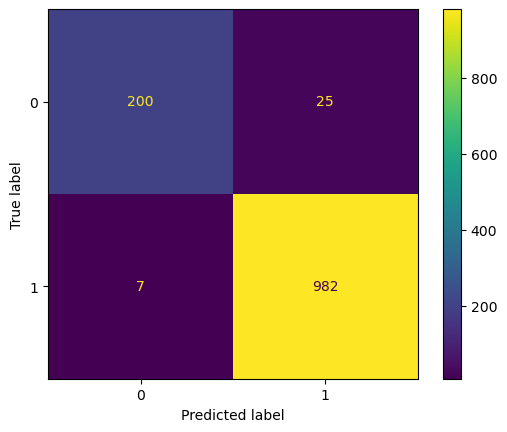

In [11]:
# Code here        
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

predicted = log_reg.predict(X_test)

fraction = 1- log_reg.score(X_test,y_test)
print(fraction)

y_pred = log_reg.predict(X_test)
cmatrix = metrics.confusion_matrix(y_test, predicted)

matrix = ConfusionMatrixDisplay(confusion_matrix=cmatrix)
matrix.plot()

tp = cmatrix[1][1]
fp = cmatrix[0][1]
tn = cmatrix[0][0]
fn = cmatrix [1][0]

percision = tp/(tp+fp)
recall = tp/ (tp + fn)
f1 = 2*((percision*recall)/(percision + recall))

print("percision = ", percision, "recall =", recall, "f1 = ", f1)


For open-ended questions like the ones below, write your answers in a new cell of code, either as a commented-out line starting with #, or as a markdown cell. Indicate what question you’re answering, by copying the question as well. For example:

11.	Explain the importance of the train-test split in machine learning. What might happen if you don’t have a proper split? [ 2 marks ]

**>>> Answer by editing this cell (double-click here)**
Importance:
Prevents overfitting, thus allowing the model to generalize.


Improper Split:
An improper split is an inaccurate representation of the actual population of data the model is trying to study. This means that the model trains itself under a false representation. The model can become unuanced, lack the ability to abstract and generalize for the entire dataset and thus real world examples, outside the dataset, that may be introduced later. 

12.	Which classifier (Perceptron or Logistic Regression) performed better at this task? Explain how you’ve arrived at this answer. [4 marks] 

**>>> Answer by editing this cell (double-click here)**

The logistic regression has performed better. The preportion of incorrectly predicted y values to total datapoints, AKA classification error, is higher in the perceptron model, this means that the perceptron is more likely to make an incorrect guess. The perceptron's classification error comes to about anywhere between 0.81 to 0.19. The classification error in the logistic regression model is often just around 0.02. This would suggest that the data is not linearly serperable. Having plotted the scatter graphs, one where x = 'Starting' and y ='Monastery_Index' and another where  x = 'Ending' and y ='Monastery_Index', the graphs are similar to those ideal for logistic regression. Since the ideal line that would divide the data points would be a horizontal line, it is not possible to predict using an x value as a predictor. The problem cannot be handled linearly like it would be in a perceptron. This is the reason that the regression model is capable of making both positive and negative guesses while the perceptron often predicted one value, 1 or 0. 

The perceptron model often produces recall of 1 since it will often predict every y value is a 1. However, the model will rarely predict values as being all 0 making the recall incalculable. The model is very tempermental, it is rare for the perceptron to make guesses of both 0 and 1 for specific train test split. The logistic regression model produces very high results on all fronts, f1, recall and percision and does so consistently whereas the perceptron is very inconsistent and sometimes can be very wrong.

13.	If you run the code from questions 8, 9, and 10 again, do the scores (precision, recall, accuracy, F1) change? Why (or why not)? Explain where those scores come from, and how do they change (or don't change) if you run the code again. [3 marks]
 

**>>> Answer by editing this cell (double-click here)**
These attributes (precision, recall, F1) do change. For the logistic regression changes occur very slightly as there will be minor changes to the accuracy and the afformentioned measures since the training set is different and the model is essentially trained on a new group of data, producing a model that would react differently than the last time the code was run. As the training data becomes different and the model is different. Thus, the actual predictions made change, which means the number of true positives, false positives, false negatives, and true negatives will change. The perceptron may sometimes not predict values of 0 at all. This results in the percision not being calculable since no values which make up the formula, that is to say all positive predictions, exist. The recall in this case is 0 since there were 0 true positives and the f1 score which is made up of the previous two values is thus not applicable either.

_______________

# Part C – Linear Regression

14. Read the file `dataset2.csv` into a dataframe. Make four scatterplots, with different variables (different columns) on the x and y axes, with the variable `quality` on the colour axis. For each scatterplot, choose a different pair of x and y variables, which cannot include `quality`. [1 mark]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<Axes: xlabel='density', ylabel='residual sugar'>

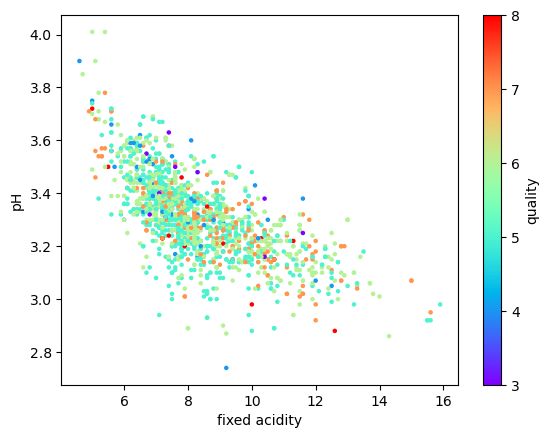

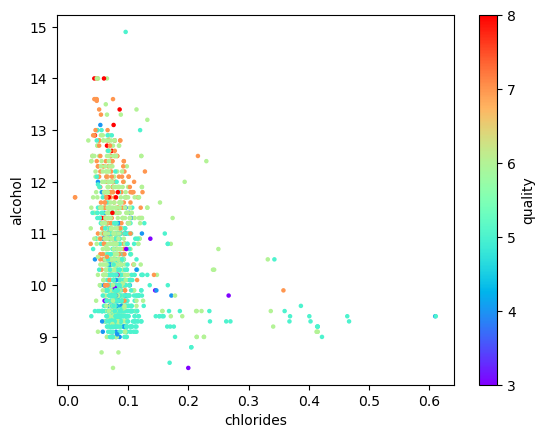

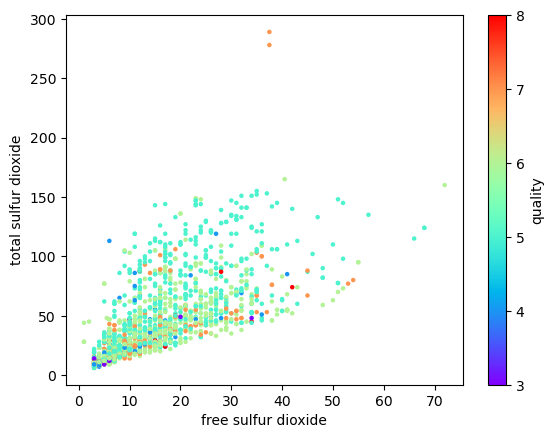

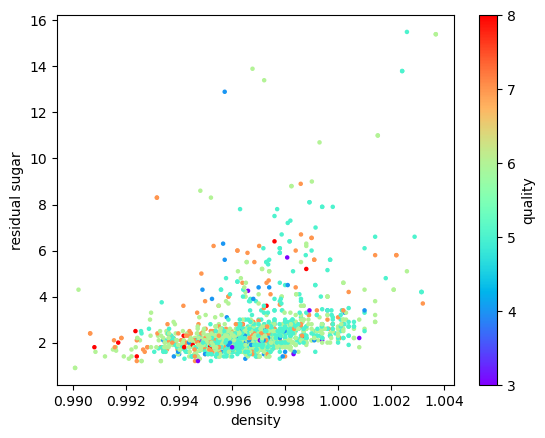

In [12]:
# Code here
chem = pd.read_csv('dataset2.csv')
# display head so I can see possible columns to choose from
display(chem.head())

chem.plot.scatter('fixed acidity','pH',c = 'quality', cmap ='rainbow',s = 5)
chem.plot.scatter('chlorides','alcohol',c='quality', cmap ='rainbow', s=5)
chem.plot.scatter('free sulfur dioxide','total sulfur dioxide',c='quality', cmap ='rainbow', s=5)
chem.plot.scatter('density','residual sugar',c='quality', cmap ='rainbow', s=5)



15. Print the Pearson correlation between the pairs of variables you have included in the scatterplots. 
For every pair of variables, print the names of the variables, and the corresponding correlation. 
[1 mark]

In [13]:
# Code here x.corr(y)

print('fixed acidity','pH', chem['fixed acidity'].corr(chem['pH']))
print('chlorides','alcohol', chem['chlorides'].corr(chem['alcohol']))
print('free sulfur dioxide','total sulfur dioxide', chem['free sulfur dioxide'].corr(chem['total sulfur dioxide']))
print('density','residual sugar', chem['density'].corr(chem['residual sugar']))



fixed acidity pH -0.6829781945685316
chlorides alcohol -0.22114054478828268
free sulfur dioxide total sulfur dioxide 0.6676664504810218
density residual sugar 0.3552833709833761


16. Linear regression: [2 marks]
    
a) Choosing the input variable X corresponds to any three columns of the dataset, except for `quality`, and the variable y corresponds to the `quality` column.

b) Fit a linear regression between X and y.

c) Print out the R2 score of the linear regression.

d) Print out the linear regression model’s slope coefficients and intercept.

In [14]:
# Code here
from sklearn.linear_model import LinearRegression

X = np.transpose([chem['alcohol'], chem['residual sugar'], chem['pH']], (1, 0))
y = chem['quality']

linreg = LinearRegression()
linreg.fit(X,y)

print("R2 score is ",  linreg.score(X,y))

print('Slope=', linreg.coef_)
print('Intercept=', linreg.intercept_)

R2 score is  0.2525029326493211
Slope= [ 0.38719996 -0.01252732 -0.8613732 ]
Intercept= 4.484152506172144


17. K-fold cross-validation [3 marks]

a) Using the same X and y variables defined in the question above, perform a K-fold cross-validation of the linear regression model, with K = 10.

b) For each fold, calculate the R2 score.

c) Print the mean and standard deviation of the 10 R2 scores.

In [15]:
# Code here
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_validate
from statistics import stdev, mean

k_folds = KFold(n_splits = 10)
scores = []

for train_index, test_index in k_folds.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    linreg.fit(X_train, y_train)
    score = linreg.score(X_test,y_test)
    scores.append(score)
    print(score)

sd = stdev(scores)
m = mean(scores) 

print(f"The mean is {m} and the standard deviation is {sd}")

-0.10990078978634377
0.15375574401789716
0.20832893895914617
0.2536973825093478
-0.21194567126510644
0.3420523524966833
0.2605663939237064
0.2532481019314181
0.03023421623607947
0.209123085758408
The mean is 0.13891597547812362 and the standard deviation is 0.17922755173337027


18.	If, rather than choosing three columns, you had used more columns to predict quality, would the R2 score of your model necessarily be higher? Why/why not? In which circumstances would it be higher or not? (Feel free to try it! But please provide a justification for your answer) [3 marks]

**>>> Answer by editing this cell (double-click here)**
Having more parameters to try to predict the quality will not necissarily lead to a higher R2 score. This is because it is not necissarily true that all the columns added will account for the change in quaility. That is to say, not every column is related to quality, not every column accounts for change quality. The circumstances in which R2 would be increased from adding a column as a predictor feature is if that predictor is in some way correlated to quality. In other words, if a high R2 score was calculated for a model using a new column then adding that column to the predictor variable would likely yield a better R2 score. This is because that column, on its own, is a good predictor for quality. Adding more columns could also make the model worse. It could lead to the model attempting to factor in variables which function as bad predictors leading to a mediocre or low R2 score. More factors is not neccisarily the answer.

19.	Imagine you have two linear regressions, one with R2 = 0.80 and another with R2 = 0.90. Under what circumstances would the first model be preferable over the second one? What if instead you had two classifiers, one with accuracy = 80% and another with accuracy = 90%? [3 marks]

**>>> Answer by editing this cell (double-click here)**
For both problems it may be that the models with higher scores are overfit and when new real world data is used performance decreases. Another factor would be performance and speed. If an application used an AI model to predict a certain value but it took a long time that may not be optimal for users. In this case it may be that the higher scoring models require a large amount of time or processing for a 10 percent improvement in performance, which depending on the case may be negligible, thus the cost to benifit ratio is in favor of the faster slightly lower performing model. In a specific case of the classifier, we may need a specific number of categories, and although adding another category would mean that accuracy is increased by 10 percent that category is useless in some case. E.g. We want to predict if the next day will be hot or cold, adding a third catergory like warm may be more accurate but may not be how we want to view and categorize data in this case. 

_____________________

# Part D – Clustering

20. K-means clustering:

a) Read the file `dataset3.csv` into a dataframe.

b) Define a variable X corresponding to the `Longitude` and `Latitude` columns of the dataset.

c) Using the K-means clustering algorithm and the variable X, cluster the trees 3 times, using k = 5, 10, 15.

d) Make a scatterplot showing the results of each clustering, with one colour for each cluster.
Suggestion: use a categorical colour map such as tab10 or tab20.
[2 marks]

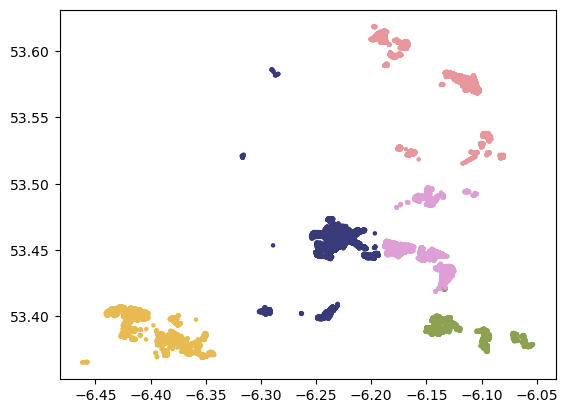

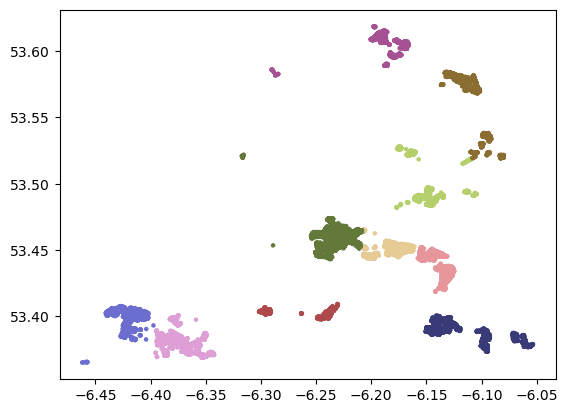

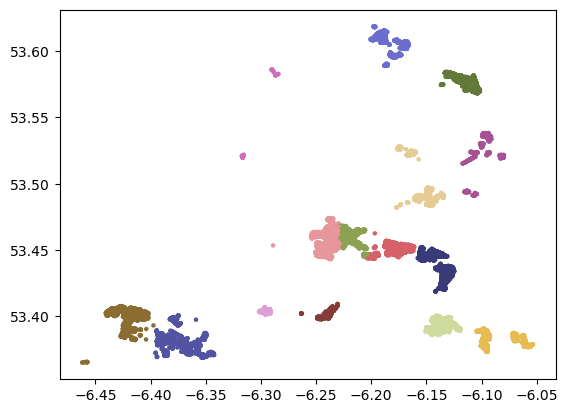

In [16]:
# Code here
from sklearn.cluster import KMeans
trees = pd.read_csv('dataset3.csv')

X = trees[['Longitude','Latitude']]
y = trees['Latitude']

clusters = [5,10,15]

for i in clusters:
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(X)
    plt.scatter(X['Longitude'], X['Latitude'], c=kmeans.labels_, s = 5, cmap= 'tab20b')
    plt.show()

21. DBSCAN clustering:

a) Using the same X variable as above, using the DBSCAN clustering algorithm, cluster the trees a total of 4 times, setting the eps parameter to 0.001, 0.005, 0.01, 0.05.

b) Make a scatterplot showing the results of each clustering, with one colour for each cluster. 
Suggestion: use a categorical colour map such as tab10 or tab20.
[2 marks]

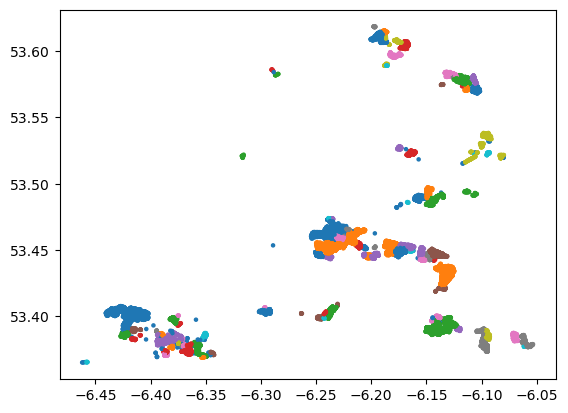

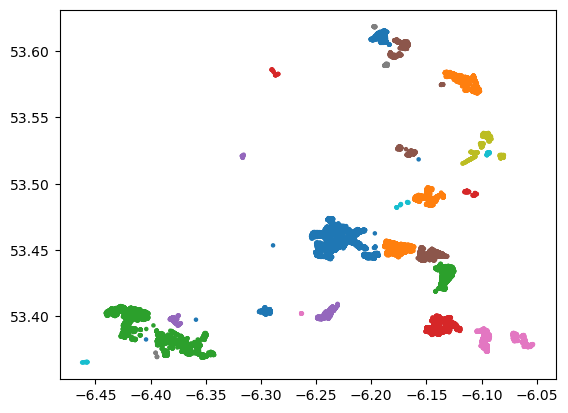

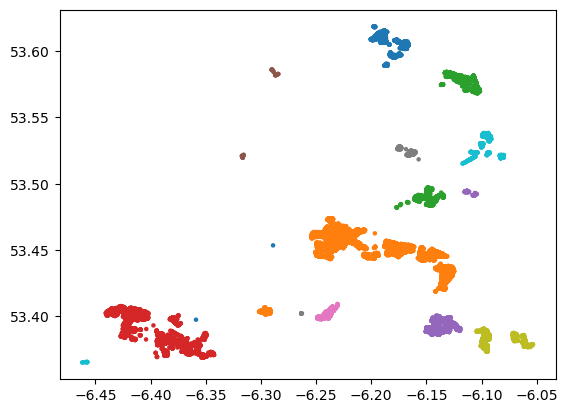

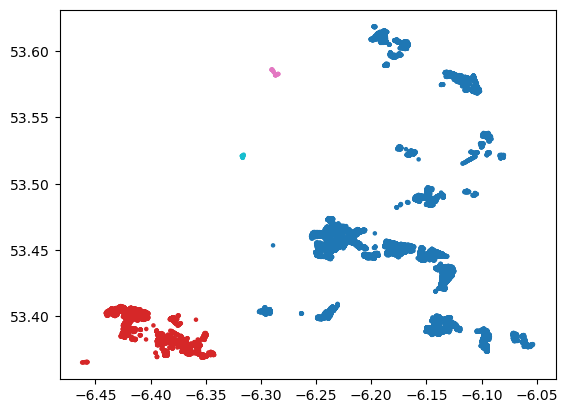

In [17]:
# Code here
from sklearn.cluster import DBSCAN

eps = [0.001,0.005,0.01,0.05]

for i in eps:
    dbscan = DBSCAN(eps = i)
    dbscan.fit(X)
    plt.scatter(X['Longitude'], X['Latitude'], c=dbscan.labels_, s = 5, cmap= 'tab10')
    plt.show()



22. Using the Silhouette score, compare the 3 runs of K-means and the 4 runs of DBSCAN. Which one of the 7 runs produces the 
best clustering, according to the Silhouette score? [2 marks]

In [18]:
# Code here
from sklearn.metrics import silhouette_score
for i in eps:
    dbscan = DBSCAN(eps = i)
    dbscan.fit(X)
    score = silhouette_score(X,dbscan.labels_)
    print(f"The score for DBSCAN eps size", {i}, "is", {score})
    

for i in clusters:
    kmeans = KMeans(n_clusters=i,n_init=10)
    kmeans.fit(X)
    score = silhouette_score(X,kmeans.labels_)
    print(f"The score for Kmeans k size", {i}, "is", {score})

'''It best model according to silhoutte score is the kmeans with k as 10'''


   

The score for DBSCAN eps size {0.001} is {0.24654779191419357}
The score for DBSCAN eps size {0.005} is {0.5407076619493659}
The score for DBSCAN eps size {0.01} is {0.393094609216632}
The score for DBSCAN eps size {0.05} is {0.43883380804344585}
The score for Kmeans k size {5} is {0.5960041191450133}
The score for Kmeans k size {10} is {0.6237793445586057}
The score for Kmeans k size {15} is {0.6196854070811371}


'It best model according to silhoutte score is the kmeans with k as 10'

23. Using the Davies-Bouldin score, compare the 3 runs of K-means and the 4 runs of DBSCAN. Which one of the 7 runs produces the best clustering according to the Davies-Bouldin score? [2 marks]

In [22]:
# Code here
from sklearn.metrics import davies_bouldin_score

for i in eps:
    dbscan = DBSCAN(eps = i)
    dbscan.fit(X)
    score = davies_bouldin_score(X,dbscan.labels_)
    print(f"The score for DBSCAN eps size", {i}, "is", {score})
    

for i in clusters:
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(X)
    score = davies_bouldin_score(X,kmeans.labels_)
    print(f"The score for Kmeans k size", {i}, "is", {score})
    

print(f'Best model according to davies-bouldin score is the DBSCAN with eps = 0.05')

The score for DBSCAN eps size {0.001} is {1.3049809967309858}
The score for DBSCAN eps size {0.005} is {0.8701655710038124}
The score for DBSCAN eps size {0.01} is {0.5967046437435546}
The score for DBSCAN eps size {0.05} is {0.4451886348997588}
The score for Kmeans k size {3} is {0.5988957846288382}
The score for Kmeans k size {4} is {0.551259767579504}
The score for Kmeans k size {5} is {0.5859005430336415}
Best model according to davies-bouldin score is the DBSCAN with eps = 0.05


24. Using another clustering algorithm (not K-means, not DBSCAN), and a range of hyperparameter values if appropriate, cluster the trees according to their latitude and longitude, as above. According to the silhouette and Davies-Bouldin scores, does any of your model runs produce better clustering? [2 marks]

Davies-Bouldin for agglomerative model with number of clusters = 3 is 
0.5839787599869167
silhoutee score for agglomerative model with number of clusters = 3 is 
0.6037740179437524


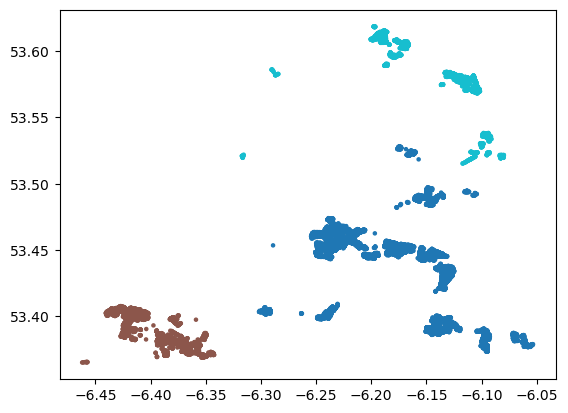

Davies-Bouldin for agglomerative model with number of clusters = 4 is 
0.5850238720138284
silhoutee score for agglomerative model with number of clusters = 4 is 
0.5938352638722624


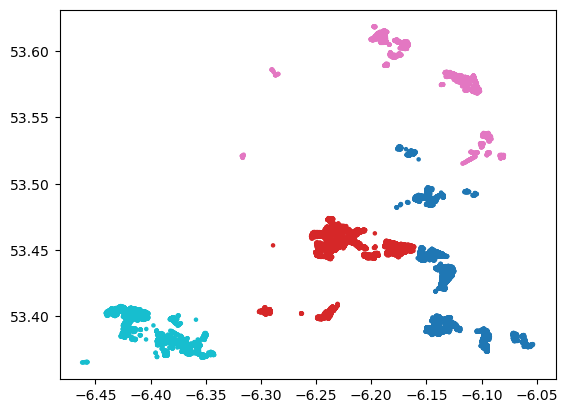

Davies-Bouldin for agglomerative model with number of clusters = 5 is 
0.6239010143358971
silhoutee score for agglomerative model with number of clusters = 5 is 
0.5797926764830069


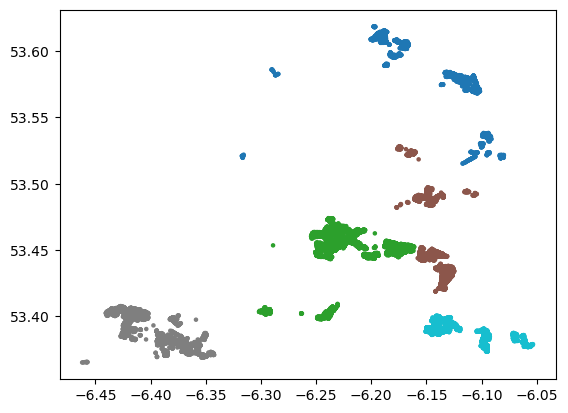

In [23]:
# Code here
from sklearn.cluster import AgglomerativeClustering

clusters = [3,4,5]

for cluster in clusters:
    agglom = AgglomerativeClustering(n_clusters = cluster)
    agglom.fit(X)
    print(f"Davies-Bouldin for agglomerative model with number of clusters = {cluster} is ")
    print(davies_bouldin_score(X,agglom.labels_))
    print(f"silhoutee score for agglomerative model with number of clusters = {cluster} is ")
    print(silhouette_score(X,agglom.labels_))
    plt.scatter(X['Longitude'], X['Latitude'], c= agglom.labels_, s = 5, cmap= 'tab10')
    plt.show()

"""Here the best of the n of clusters is five and matches up pretty well with the best K-means and DBSCAN values"""

25. Usually, DBSCAN takes longer than K-means to run, and the time it takes to run is affected by the eps parameter. Explain why that is the case. [4 marks]

**>>> Answer by editing this cell (double-click here)**
In DBSCAN each datapoint is checked and can have a Big O of O(n^2) while K-means has a big O value of O(kndt). 
In K-means the clustering happens at a larger scale, unlike DBSCAN where there the data is being processed point by point. The changes in K-means occurs relative to the centroid and every other datapoint which takes less time than processing each data point to the other points in its epsilon. 

Having a larger epsilon means that more data points are clustered at once since the area around a point is a larger, resulting in more point being in the epsilon and thus likelier to meet the minpoints hyperparameter. This means that every time a datapoint is processed it is likely more points are clustered. Conversely, if the epsilon is smaller, it is less likely the min points parameter could be met, thus it would take longer to cluster each datapoint since it is less likely for langer number of datapoints to be clustered at once.

26. Provide an example of one case in which it might be better to use DBSCAN rather than K-means, and an example of one case in which it might be better to use K-means rather than DBSCAN. Explain why, in both cases. [4 marks]

**>>> Answer by editing this cell (double-click here

When to use DBSCAN over K-means:
K-mean often fails when there are multiple densities, shapes and sizes, so DBSCAN would be better in those cases.
When not all datapoints should be clustered or there is noise.
When there are outliers, DBSCAN will not be effected by those points.
It may be the case that the same clustering should be produced each time, this does not happen with K means as the starting centroid is heavily influencial and can cause drastic changes in clusters.

When K-means should be used over DBSCAN:
When a certain number of clusters is desired
When a higher speed of clustering is important.



_____________________

# Part E – Model selection

27. Consider the figure in the PDF and compare models A and B. In each case, what difference would it make to add more training examples to the training set? Explain your reasoning. [4 marks]

**>>> Answer by editing this cell (double-click here)**
In the A example:
It would make no difference, the line for both testing and training would continue to plateau at the same level or error.
This is likely due to the fact that the predictor(s) used in the model can only predict to that degree where error will stagnate no matter how many more points are added. To put simply, although the model is trained and fit well to the data, the choice of feature(s) is not a good as a predictor. 

In example B:
The graph suggests that that the testing error would continue to decrease. the training line seems to be increasing very slightly. Adding more data in this example would cause a decrease in testing error since likely due to the fact that adding more data helps to create a better model even if the model has been trained on a lot of training data. This could be due to the level of variance and amount of outliers in the training set. Thus adding more data would correct the model. There may have also been slight amounts of bias inj the random selection of data that produces an inaccurate pattern. Thus adding more data would paint a more accurae picture of the data and the model would be fit more accurately to the data. 

28.	Consider the second figure in the PDF and compare models A, B, and C. What is the difference between the three models? How does that relate to the bias-variance trade-off? [6 marks]

**>>> Answer by editing this cell (double-click here)**

In terms of variance B and A both have low variance, meaning the difference betweeen model accuracy between the two data sets is quite low. However of these two option be seems the best fit. It has a low variance and a high bias, meaning it is consistently predicts at a low level of error. Option A also has high variance but low bias, it consistently predicts to the same degree but the predictions are not accurate. Option C is overfit, it captures the trend in training sets very well but when it comes to real ground truth it is quite bad. Option be is well fit, it predictions are highly accurate for both training and testing data. Option B is underfit, it can neither predict properly in training or testing. The trade off of bias and variance relates to how increasing the bias of a model when training does not mean the model is good.  The model can be specific for the training data that for another set, testing data, the level of accuracy is completely different. That is the case with option C. However, when the right balance is hit, option B, it is consistently good no matter the dataset. In option A however, the model is bad at predicting in either data set, the model cannot capture the trend properly and thus in both training and testing cases it is a bad prediction. 


29.	What is overfitting? Why is that a problem, and how can one avoid it? [3 marks]

**>>> Answer by editing this cell (double-click here)**
Overfitting is when a model fits to exactly and percisely to datapoints that it does not allow for generalization. Thus when given a new data point the prediction is inaccurate. Overfit models have a high bias for the training set they have been fitted on, however when introduced to the testing set the model is inadequate. 

Overfitting can be avoided by using a good train-test split. Helps for the model to generalize.  

________________

# Part F – Dimensionality reduction

Consider a scenario where you are working with a complex high-dimensional dataset derived from a biomedical application to detect a disease. The data is expected to have both linear and non-linear relationships, and you aim to reduce the dimensionality for the following purposes: first, to visualize the data in a lower-dimensional space to identify potential clusters or patterns that might indicate different disease states, and second, to preprocess the data for a downstream machine learning task, such as classification of samples into healthy or diseased states. 

30.	Discuss the advantages and disadvantages of using PCA, t-SNE, and UMAP for the visualization purpose, considering factors such as the preservation of local and global structures, computational efficiency, and the potential introduction of artifacts. [3 marks]

**>>> Answer by editing this cell (double-click here)**
All three processes can help reveal different things. However, I would say that when clustering t-SNE and UMAP are likely best. PCA helps reveal features that cause the highest variance however this does not necessarily help with clustering. t-SNE and UMAP do help with clustering. t-SNE has the disadvantage of not being memory efficient, and not perserving global structures very well. UMAP is a process that solves these issues, it is more efficient and perserves structures better. UMAP helps cluster data very well. 

31.	Explain how the choice between these dimensionality reduction techniques might change when, after visualising, you want to do the preprocessing for the machine learning task. [3 marks]

**>>> Answer by editing this cell (double-click here)**

Here PCA is more commonly used. It reveals features that effect the variability of data best, thus those features or combination of features can be chosen. Here we are not trying to view data in a way we can view clusters, we are trying to find the factors which effect the data the most. By doing this we can disacrd features that do not help us in our machine learning task, making the machine learning/ training aspect more efficient. Other processes such as Forward search, backward search, and decision trees can also be used to preprocess the data. 

32.	Discuss the role of interpretability and stability in the choice of dimensionality reduction technique for both tasks. How might the stochastic nature of t-SNE and UMAP influence the reproducibility of your analyses, and how can PCA's linear assumptions limit its usefulness in capturing complex relationships in the data? [3 marks]

**>>> Answer by editing this cell (double-click here)**
PCA's linear limitation could lead to inaccuracy or a lack of effectiveness, PCA works best with linear data. ALthough it may capture some or all of the linear relationships, it will find it hard to present the non-linear relationships. 

t-SNE and UMAP will change each time it is run. Each time it is run a new cluster or trend may reveal itslf. 

t-SNE, UMAP and PCA will all help with interpretability of data. This helps the process of feture selection, we now know what features have an effect on the data.

________________

# Part G – Applications of Machine Learning

33.	Discuss a scenario where a high accuracy rate might be misleading in evaluating the performance of a classifier. What other metrics would you consider, and why? [3 marks]

**>>> Answer by editing this cell (double-click here)**
This can be context dependant. There may be a classifier that classifies everything as one specific class. If the majorirty of datapoints in a dataset is in that classs then the accuracy score will be high. Even though the accuracy is high, this does not mean the classifier is doing its good job. If it is designed to spot exceptions to a rule it is doing a very bad job. For those few but important datapoints which deviate from the rule the model sees no difference. Recall or percision, depending on how positives or negatives are categorized, could be very low. The composition of the data, the ground truth and the context are important factors to bear in mind when looking at the accuracy score. 

Metrics to be considered:
When a positive result is important and of great consequence, it is important to look at the percision metric. It will show how often a positive result is actually positive. Vice versa when a negative classification is of great consequence the recall metric should be looked at. If both are imporant F1 score can be used.


34. Given a classification task and a dataset, sometimes it’s impossible to make a classifier with 100% precision and 100% recall simultaneously. Explain why. [3 marks]

**>>> Answer by editing this cell (double-click here)**
There is a tradeoff win maximising one value. When attempting to maximise percision the recall value decreases. This is because as your model changes its threshold to maximise percision it is less likely to predict a positive value. As a result the values which are classed as positive are more likely to be true positives. However, there will be more false negatives as a result of this threshold change. 

This happens often since the guassian distributions used to map data of different classes often overlap thus it is impossible to draw the perfect threshold to get 100 percent on both percision and recall.

35. In the case of the question above, the data scientist might have to choose between having higher precision or higher recall. Provide an example where it’s preferable to get high recall and low precision (and explain why), and another example where it’s preferable to have high precision and low recall (and explain why). [4 marks]

**>>> Answer by editing this cell (double-click here)**
For the first case (high recall, low percision):
This would be good for cases where it is better to be safe than sorry. In a medical context it is better to test positive for a disease, like cancer, and have the condition be confirmed and examined further, rather than take the risk of completely missing the disease. Another medical example is in the case of a COVID test, it is better for the test strip to show a false positive and let the patient take further tests instead of letting them spread the disease or be left untreated. 

For the second case(low recall, high percision):
If we look at the case of facial identification software in a phone, taking the correct identification of the owner's face as a true positive, the correct identification of a non-owner's face as a true negative, and vice versa. We want the recall level to be very low, we do not want to let people in the phone. Here it is riskier to have a false positive, so we would rather a false negative occur. Another example would be in fingerprint scanners which protect intrusion into an important area, (digital or physical). It is highly undesrible any error occurs but it is much worse for a false positive to occur. Here a tradeoff in favor of percision is more benificial, a false positive can be highly catastrophic. 


Over this module we explained many examples where a machine learning algorithm was trained on a dataset and became reasonably good at a task, but had a fundamental flaw in its training dataset or feature engineering that ultimately made the model inaccurate or inappropriate for use in real life.

36. Give an example of a machine learning algorithm trained for a particular task where it achieves high accuracy in one context, but low accuracy in another context. Explain what could cause that, how to diagnose it, and suggest a way to address it. [4 marks]

**>>> Answer by editing this cell (double-click here)**

Model may be trained on an improper data set. It is adequately trained on a dataset that is biased, out-dated or wrong in some other way. When testing occurs in the real world it will not work as well. To counteract this,  training and testing splits data can changed, additionally a k-fold cross validation can be performed. Another dataset which is more up to date can be curated. An example of this could be a machine learning algorithm that controls traffic lights. If the data is not up to date, or the training data is biased towards weekends or weekdays, then the model will make incorrect decisions. Here it is important to monitor any new changes in trends as road networks, commerce and a myriad of factors effect traffic. 

To devalop this idea further, the model is a classifier which takes in factors such as time of day, amount of cars on the road, what turns cars are trying to make, car speeds and more. Data has been taken a year before a new mall has been added. A main road to the mall is through this AI controlled traffic section. The model is working off of traffic patterns from a previous year and operating in such a way that creates a traffic jam. To navigate this a new dataset should be created and the modle should be retrained. Additionally, the model can be constantly updated so that a new problem does not occur and trends are adapted to as they begin occuring.



37. Give an example of a machine learning algorithm that might have low errorin its training and testing datasets, but that still would have a fundamental flaw in its application that is not captured by the error metric. Explain why that is the case, and suggest a way to address that. [3 marks]

**>>> Answer by editing this cell (double-click here)**

A perceptron may have low errror when applied a classification situation that is not linearly seperable. Usually the perceptron makes a single guess for all datapoints. The dataset has a large number of datapoints that, for the sake of arguement, are positive. The perceptron may predict all values as being positive. Thus the model has a high accuracy. However the perceptron does not actually capture the relationship between features, it is only guessing correctly most of the time since it is statistically likely. To solve this, the AI engineer should first plot graphs to better understand the datapoints themselves. This way they would better understand what model may work better when trying to classify datapoints, possibly a logistic regression or a neural network may work better. It is up to the engineer to gain a better understanding of the data itself. 

_________________